In [70]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR

In [47]:
transform = transforms.ToTensor()

batch_size = 32

trainset = torchvision.datasets.MNIST(
    root="../data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="../data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

print("trainset:", len(trainset))
print("testset:", len(testset))


trainset: 60000
testset: 10000


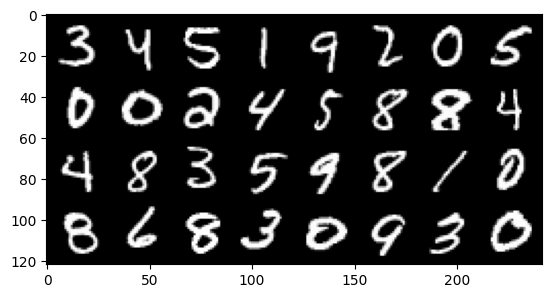

3 4 5 1 9 2 0 5 0 0 2 4 5 8 8 4 4 8 3 5 9 8 1 0 8 6 8 3 0 9 3 0


In [48]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [93]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 16, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 5 * 16, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [115]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [116]:
EPOCH = 5

for epoch in range(EPOCH):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        print(f'[{epoch + 1}, {i + 1}] Loss: {loss.item():.3f}')

        if i % 100 == 99:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    print(f'Epoch {epoch + 1} completed')

print('Finished Training')

[1, 1] Loss: 2.294
[1, 2] Loss: 2.320
[1, 3] Loss: 2.285
[1, 4] Loss: 2.240
[1, 5] Loss: 2.222
[1, 6] Loss: 2.292
[1, 7] Loss: 2.146
[1, 8] Loss: 2.117
[1, 9] Loss: 2.111
[1, 10] Loss: 1.961
[1, 11] Loss: 1.897
[1, 12] Loss: 1.531
[1, 13] Loss: 2.160
[1, 14] Loss: 2.309
[1, 15] Loss: 2.213
[1, 16] Loss: 2.117
[1, 17] Loss: 1.861
[1, 18] Loss: 2.478
[1, 19] Loss: 1.988
[1, 20] Loss: 1.689
[1, 21] Loss: 1.715
[1, 22] Loss: 1.602
[1, 23] Loss: 2.046
[1, 24] Loss: 1.853
[1, 25] Loss: 1.075
[1, 26] Loss: 1.393
[1, 27] Loss: 2.412
[1, 28] Loss: 1.745
[1, 29] Loss: 1.618
[1, 30] Loss: 1.389
[1, 31] Loss: 1.544
[1, 32] Loss: 1.383
[1, 33] Loss: 0.878
[1, 34] Loss: 1.372
[1, 35] Loss: 1.210
[1, 36] Loss: 1.134
[1, 37] Loss: 1.049
[1, 38] Loss: 1.015
[1, 39] Loss: 1.208
[1, 40] Loss: 1.227
[1, 41] Loss: 1.970
[1, 42] Loss: 1.376
[1, 43] Loss: 1.150
[1, 44] Loss: 0.836
[1, 45] Loss: 0.849
[1, 46] Loss: 0.528
[1, 47] Loss: 0.731
[1, 48] Loss: 0.817
[1, 49] Loss: 0.981
[1, 50] Loss: 0.636
[1, 51] L

In [117]:
model.eval()
test_loss = 0
correct = 0

with torch.no_grad():
    for data, target in testloader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(testloader)
accuracy = 100. * correct / len(testloader.dataset)

print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(testloader.dataset)} ({accuracy:.2f}%)')

Test set: Average loss: 0.0527, Accuracy: 9840/10000 (98.40%)
